# Loading the Model

In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')


# Creating Story by concatenating the captions and iterating

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

def generate_story(captions, model, tokenizer, max_length=50, beam_width=3, top_k=30, top_p=0.85, temperature=0.7):
    # Start the story with an introductory phrase or keep it empty
    story = ""
    for caption in captions:
        # Combine current story with the next caption to maintain context
        input_text = story + " " + caption
        inputs = tokenizer.encode(input_text.strip(), return_tensors='pt')

        # Generate the next part of the story
        outputs = model.generate(
            inputs,
            max_length=inputs.shape[1] + max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,  # Avoid repetitive n-grams for coherence
            do_sample=True,  # Enables sampling-based generation
            top_k=top_k,  # Limits to the top k words for diversity
            top_p=top_p,  # Nucleus sampling for flexibility
            temperature=temperature,  # Controls randomness
            num_beams=beam_width  # For beam search (set >1 to enable)
        )

        # Decode the generated text and update the story
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        story = generated_text

    return story

# Load a pre-trained model and tokenizer (e.g., GPT-2)
model_name = 'gpt2'  # You can change this to any compatible model name
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Example captions
captions = [
    "A group of people walking up a snowy slope.",
    "A person on a snowboard on a mountain.",
    "A man climbing up a snowy mountain.",
    "A man standing on top of a mountain.",
    "A man sitting on top of a snowy mountain."
]

# Generate and print the story
print(generate_story(captions, model, tokenizer))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

A group of people walking up a snowy slope.

"This is the first time I've ever seen anything like this," he said. "I've never seen this kind of thing before." A person on a snowboard on a mountain. A man who has never been to a ski resort. And a woman who is a member of the U.S. Forest Service, who was on her way to the summit when she was hit by a car. All of these things are happening in A man climbing up a snowy mountain. They're all happening at the same time. It's not just a matter of snowboarding, it's also about the safety of those who are on the mountain, and how they're going to protect themselves from the dangers that are coming their way. A man standing on top of a mountain. He's trying to get to his feet, but he can't get up, so he's on his own. There's a lot more to it than that. That's why I'm here. I want to make sure that people are safe. A man sitting on top of a snowy mountain. This is not a place where you can just sit there and say, 'Oh my God, this is dangerous.' Y

# Create story by transition phrasing and iterating

In [6]:
from transformers import AutoModelForCausalLM, AutoTokenizer

def generate_story(captions, model, tokenizer, max_length=50, beam_width=3, top_k=30, top_p=0.85, temperature=0.7):
    # Start with an initial prompt to set the stage for the story
    story = ""
    
    for caption in captions:
        # Construct the input by combining the current story and caption with transition phrasing
        input_text = f"{story} {caption}. What happened next was"
        inputs = tokenizer.encode(input_text.strip(), return_tensors='pt')

        # Generate continuation based on the current input
        outputs = model.generate(
            inputs,
            max_length=inputs.shape[1] + max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            top_k=top_k,
            top_p=top_p,
            temperature=temperature,
            num_beams=beam_width
        )

        # Decode the generated text and trim redundant parts
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        
        # Keep only the new content that was generated, omitting the input portion
        new_content = generated_text[len(input_text):].strip()
        
        # Combine the new content with the existing story
        story = story + " " + new_content

    return story.strip()

# Load a pre-trained model and tokenizer (e.g., GPT-2)
model_name = 'gpt2'  # You can change this to other models like 'gpt-neo' or 'gpt-j'
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Example captions
captions = [
    "A group of people walking up a snowy slope",
    "A person on a snowboard on a mountain",
    "A man climbing up a snowy mountain",
    "A man standing on top of a mountain",
    "A man sitting on top of a snowy mountain"
]

# Generate and print the story
print(generate_story(captions, model, tokenizer))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

a bit of a mystery.

"I was walking down the slope, and I saw a bunch of guys coming up the other side of the hill. And I thought, 'What the hell is going on?' And then I looked up and that I was in the middle of an avalanche. I didn't know what to do, but I knew I had to get out of there. So I did," he said. "And that's when I realized that there was no way I could a lot more complicated than I'd ever imagined. It was like a rollercoaster ride, you know? I don't think I've ever seen anything like it." a story that has been told countless times before. The story of how a man fell from a high-rise building in New York City and ended up on the ground in a snow-covered field. A story about how he was able to climb a a tale that will be told for years to come.


# Adding RL on Create story by transition phrasing and iterating

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 1:
Story:
Once upon a time, in the heart of the mountains, they walked.

"What are you doing here?" asked the young man, who was standing in front of them. He was wearing a black jacket and a white shirt. His face was covered with a thin layer of sweat, and his eyes if it were a scene out of a fairy tale, but the man's eyes were filled with joy. "I'm here to help you. I want to give you a chance to learn how to ride a bike. You need to be able to you were riding up the mountain, so I wanted you to know that I am here for you." The man looked at him with an expression that seemed to indicate that he was about to say something, then he said, "It's okay, I I was riding. It's not like I'm going to let you down. This is my home. If you don't like it, you can go back to your home country. But if you do, it will be a lot easier for me he spoke. A young woman, dressed in black, sat on the ground, her face covered in sweat. She was holding a piece of paper that she had written on her 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 2:
Story:
Once upon a time, in the heart of the mountains, they were about to enter the forest.

"Haha, this is the first time I've ever seen such a beautiful scenery. I can't wait to see it again." The young man said with a smile. "It's really beautiful if it was a dream. It's like I was watching a movie, but I don't know what it's about. What I do know is that this place is truly beautiful. And I'm so glad that I got to experience it." the man climbed up to the top of a mountain, and he looked down at the ground. His eyes were filled with happiness. He had never seen anything like it before. This place was so beautiful, he couldn't help but think of it. he gazed down on the mountain with his eyes wide open. As he stared at it, his heart began to beat faster and faster. When he saw that he could see the sky above him, it made him feel like he was in heaven. In if he were on a journey. There was no way he would be able to get out of there. But he had no choice but to do so. I

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 3:
Story:
Once upon a time, in the heart of the mountains, the two men approached.

"What are you doing here?" asked one of them. "Are you going to tell me where you are going?"
... "No, I don't want to know," replied the other man. the man and the woman looked at each other. Then the men began to speak, and then the women spoke again. They spoke of their love for the mountain, their desire to climb it, of its beauty, its majesty. All of these things if it were a dream. A woman climbed up to the top of a mountain and said, "I'm going up there to see what it's like to be a man." The man said to her: "You're not going down there, if you were on a stage playing a song. It was beautiful. You couldn't believe what you saw. There was no doubt in your mind that this was a beautiful place. I saw it all the time. But I didn't know what to if there were no words, no matter how hard I tried to explain it to him. He was in a state of shock, his eyes were wide open, he could not believe t

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 4:
Story:
Once upon a time, in the heart of the mountains, they walked by.

"That's right, that's why I'm here. I want to talk to you about this." The girl who was standing next to them said. "I'm sorry, but I can't help but think that if it were a dream. It was like a nightmare, and I couldn't stop thinking about it. That's what I wanted to say. But I don't know how to explain it, so I'll just leave it at that. Let's if there was no one there. He walked up to the girl and said to her, "Don't worry, I won't let you down. You're not going anywhere." She said that she was going to climb up the mountain to see if the two of them looked at each other. As they looked back at the scene, the man who had been sitting on the other side of A's body suddenly stopped. Then he turned around and walked back to where he was sitting. At that moment if A had never seen anything like it before. After that, A looked up and saw that there were two people standing there looking at him. They looke

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 5:
Story:
Once upon a time, in the heart of the mountains, they walked.

The group was standing in front of a mountain. They were looking at the mountain, and they saw that it was covered with snow. Their eyes were filled with astonishment, as if they had never seen anything like it before they looked at each other. It was as though they were in a dream, but they did not know what was going on. At that moment, the snow began to fall, causing the group to be unable to move. This was the first time they came to a halt. There was a man standing on the other side of them. He was wearing a white robe and a black robe. His face was pale and he looked like he was about to die. As he spoke, he said, the man's face turned pale, his eyes turned red and his body became pale. Then, a voice came from behind him, "The man is dead." The man looked around and saw the dead man lying on his back. When he turned around the two men were standing there. A woman stood next to them and she said to 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 6:
Story:
Once upon a time, in the heart of the mountains, they walked along the path.

The group was standing on the side of a mountain. They were looking at the scene from a distance, but they could not see it clearly. It was as if they were in a dream. As they looked the group looked up and saw the person standing there. He was a young man with a long beard. His face was pale and his hair was long and he was wearing a black robe. A white robe was draped over his head and on his back they watched the man climb up the mountain, and they saw a man standing in front of them. This man was dressed in black and was carrying a large black sword. In the middle of this man's body were two black swords. These swords were the two groups looked at each other. There was no way that they would not be able to see the same thing from the other side. However, there was also no doubt that this person was the one who had the sword in his hand. " they stared at him. Even though they did not kn

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 7:
Story:
Once upon a time, in the heart of the mountains, they walked up the mountain.

"I'm sorry, but I don't know what to do. I can't do this. It's too dangerous, and I'm afraid I won't be able to stay here for long." The girl the snow began to fall. She was wearing a white dress and a black skirt. Her face was covered in snow, her hair was tied back in a ponytail and her eyes were covered with snow. "I'll be fine, I promise. if it was a dream. There was no way I could have done this without you. You were my friend, my best friend. But I couldn't bear to see you die, because I didn't want you to die. And now you're if nothing had happened. My heart was broken. As if I had never seen such a scene before. What could I do? I was afraid that I would never see a man like you again. So I decided to go back to the village. if the world had changed forever. He was standing in front of me, looking at me with a smile on his face. Then he said, "It's okay, it's alright. We'll see ea

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 8:
Story:
Once upon a time, in the heart of the mountains, they were about to pass by.

"What are you doing here?" A voice came from behind them, and the two of them looked at each other in surprise. "What's going on here? What's the matter with you?" if it were a scene from a movie, with the snow on top of it, the wind blowing down on the mountain, as though it was a breeze. It seemed to be the same person, but he was wearing a black jacket and a white if he were talking to himself. He was standing in front of a mountain that was covered in snow. A white man with a long black beard and black hair was walking up to him, looking at him with an expression that looked like he wanted to if there was no one else in sight, so they turned their heads to look at the man who was staring at them. As they did so, he turned his head to face them and said, "I'm sorry. I was just trying to if I had seen it all before." The man looked up and saw that his eyes were wide open and he had a smi

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 9:
Story:
Once upon a time, in the heart of the mountains, they were about to enter the cave.

"I'm not sure if this is the first time I've seen this kind of thing, but it looks like it could be the last time. It's not like I'm going to be able if it was a dream. I can't believe it. There's no way I could have seen it coming. This is not the end of my journey. If I don't see it again, I'll have to go back to the mountain." the man's face turned red and his eyes lit up as if he was looking at the sky. He was standing in front of a mountain, his face was covered in snow, and he looked like he wanted to die. His body was frozen in he stared at a man who had been standing there for a long time with his hands on his hips. In the middle of it all, he could see that there was no one there. No one was there to see what was going on. " the snow began to fall. A young man, who was wearing a white shirt and a black jacket, was sitting in a small room with a few other people. Behind him,

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 10:
Story:
Once upon a time, in the heart of the mountains, they walked up the mountain.

The group was standing in front of a large tree. It was a huge tree that was covered in snow. They were standing on top of it. As they looked at it, they could see that it was if it were a scene from a movie, with the snow on the ground and the person sitting on it looking at the scene. At that moment, the group of people suddenly began to look at each other, and they started to talk about the situation if the man had been standing there for a long time. He was wearing a white robe and a black robe. His face was pale and his eyes were filled with a coldness. "I don't know what happened to you, but you're if you were in a dream. You're a man who has never seen anything like it before. I have no idea what's going to happen next. If it's a nightmare, then I won't be able to see it again. But if if a story is being told. That's why I'm here, to tell you what I've seen. And I want you to know

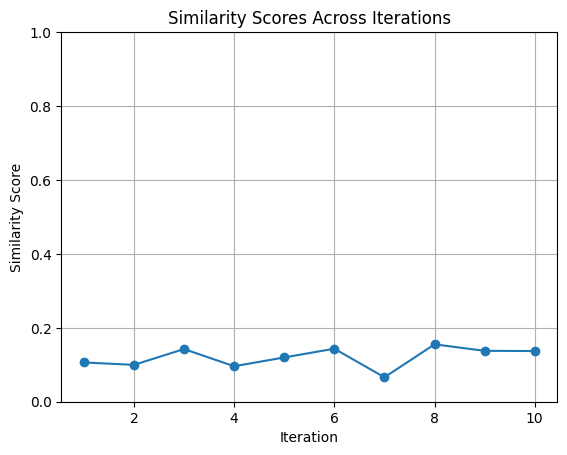

In [9]:
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

def calculate_similarity(text1, text2):
    vectorizer = TfidfVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    return cosine_similarity(vectors)[0, 1]

def generate_story(captions, model, tokenizer, max_length=50, beam_width=3, top_k=30, top_p=0.85, temperature=0.7):
    story = "Once upon a time, in the heart of the mountains,"
    for caption in captions:
        input_text = f"{story} {caption}. The scene unfolded as"
        inputs = tokenizer.encode(input_text.strip(), return_tensors='pt')

        outputs = model.generate(
            inputs,
            max_length=inputs.shape[1] + max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            top_k=top_k,
            top_p=top_p,
            temperature=temperature,
            num_beams=beam_width
        )

        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        new_content = generated_text[len(input_text):].strip()
        story = story + " " + new_content

    return story.strip()

# Load model and tokenizer
model_name = 'gpt2'
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Input captions
captions = [
    "A group of people walking up a snowy slope",
    "A person on a snowboard on a mountain",
    "A man climbing up a snowy mountain",
    "A man standing on top of a mountain",
    "A man sitting on top of a snowy mountain"
]

# RL-inspired iterative process
iterations = 10
similarity_scores = []
temperature = 0.7  # Initial value
top_k = 30
top_p = 0.85

previous_similarity = 0.0

for i in range(iterations):
    story = generate_story(captions, model, tokenizer, temperature=temperature, top_k=top_k, top_p=top_p)
    combined_captions = ' '.join(captions)
    similarity = calculate_similarity(story, combined_captions)
    similarity_scores.append(similarity)

    print(f"Iteration {i+1}:")
    print(f"Story:\n{story}\n")
    print(f"Similarity Score: {similarity:.4f}\n")

    # Reinforcement learning-inspired adjustment
    if similarity > previous_similarity:
        # Reward: Increase exploration if similarity improves
        temperature = min(1.0, temperature + 0.01)
        top_k = min(50, top_k + 1)
        top_p = min(0.95, top_p + 0.01)
    else:
        # Punishment: Reduce exploration if similarity drops
        temperature = max(0.5, temperature - 0.01)
        top_k = max(10, top_k - 1)
        top_p = max(0.75, top_p - 0.01)

    previous_similarity = similarity

# Plot similarity scores
plt.plot(range(1, iterations + 1), similarity_scores, marker='o')
plt.title('Similarity Scores Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Similarity Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 1:
Story:
the group approached.

"What are you doing here?" asked one of the men. "What do you want to do here? You're going to kill me?"
...



The group continued to walk up the slope the group made their way down the steep slope. They were surrounded by a group of people who were trying to get to the summit. One of them was wearing a ski mask, and the other was carrying a gun. Both men were wearing ski masks the two men walked up to each other and started shooting at each another. As they were shooting, the man in the mask started to cry out in pain. He was covered in blood, his face was swollen, he was bleeding profusely, the three men began to run away from the scene. A few minutes later, they heard a loud bang and saw a man with a knife in his hand. It was a young man, about 20 years old, with dark hair and a beard. the crowd of men gathered around him and began shooting. At one point, one man was shot and killed by another man who was standing in front of him. There wa

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 2:
Story:
the two men, dressed in black, walked up the hill.

"I saw them," said one of the men. "They were standing in front of me. They were trying to get away from me, and I couldn't see them I was walking down the road. I had to stop and look at them. It was like they were in a movie. There was a lot of blood, but I didn't know what was going on. Then I looked at the man and he I walked down. He was wearing a black jacket and black pants. And he was holding a gun to my head. That's when I saw the blood on his face. So I said, 'What are you doing?' He said 'I'm I stood up. My head was on the ground and my hands were on my chest. But I don't think I could see anything. All I can tell you is that there was blood all over my face and that it was coming out of my I watched it unfold. You can see it in the video below. This is what happened to me: I got up and went to the hospital and they took me to a local hospital where they treated me for a blood clot. We were told that

Si

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 3:
Story:
the group tried to get out of the car.

"I was just trying to keep my head down and not get hit by a car," he said. "I just thought, 'Oh my God, I'm going to die.'" the group made their way down the mountain, and the man on the other side of it, who was wearing a ski mask, was struck by the snow. He was taken to the hospital, where he was pronounced dead at 3:30 a. the men climbed up the hill, but the two men didn't know each other, so they decided to go back to their car and try to make it back down. When they got there, they saw a group of people on top of them. the three men got out and started running. They ran into the woods and got into a fight with some people. One guy was hit in the head with a rock, while the others were hit with rocks. It was a very violent fight." the four men were being treated for their injuries. (Photo: Courtesy photo) The group then made it to a small campground where they stayed for a few days. After that, it was time for them to mov

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 4:
Story:
the two men approached.

"This is the first time I've seen this kind of thing in my life," he said. "I don't know if it's a coincidence or not, but this is something that's been going on for I was riding down the hill. It was like a scene out of a horror movie. I felt like I had to do something to protect myself." the men climbed up to the top of the mountain, where they were met by a large group of people who had come from all over the world to watch the event. One of them, who was wearing a ski mask, told the group that he the man in the mask was approached by two other men who were wearing ski masks. They were all in their 20s and 30s, and they all said that they had seen a man with a mask on and that it looked like he was going the two groups of men tried to get away from each other. At one point, one man said to another man, "You're going to kill me." The men said they would kill him if they saw him again. Then, the other man

Similarity Score: 0.1532



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 5:
Story:
the two men walked up the hill.

"I was just walking down the slope, and I saw this guy. I was like, 'Oh my God, he's dead,'" said one of the men, who asked not to be identified the two climbed the steep hillside, where the man's body was found. He was pronounced dead at the scene. A second man, identified as a man in his 20s, was taken to a local hospital with non-life-threatening injuries the three men were walking in the same direction when they heard a loud bang and saw a body lying on the ground. "I thought it was some kind of animal," said the third man who saw the body, "but I didn't see anything if it were some sort of big animal." The man was described as about 5-foot-8 and 180 pounds, with short brown hair and brown eyes. His face was covered with a black bandage and he was wearing a white shirt and black the four men and two women walked down a steep, rocky slope. They were followed by a group of people, including a woman in her 40s and a young man with d

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 6:
Story:
the two men approached.

"I'm here to help you," one of the men said. "I want you to know that you are not alone. You are a part of our community. We are here for you. And we are we were about to leave. It was a very tense moment. I don't know what to say. But I know you're here because we love you and we want to see you again. So please, please stay with us. Thank you." the two women walked up to each other and began to talk. One of them said, "Thank you for coming." The other said: "You're welcome to stay. Please stay here. Don't worry about it. Just stay."
. the man walked away from the scene. He was wearing a white shirt and black pants. His face was covered in blood and his hands were tied behind his back. There was blood on his face and he was bleeding profusely from his mouth. the three men left the area. They walked back to their cars and drove to the city center, where they found the bodies of two young men who had been shot in the head and chest. Both men 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 7:
Story:
the group was trying to get to the top of the hill.

"I'm not sure if I'm going to be able to do this, but I think I can do it. I've been doing this for a long time, and I was going down. It was a very, very surreal experience," he said. "It was really, really surreal." the group made their way down the mountain, where they were met by a group of hikers. the hikers tried to reach the summit. But the man was not there. He was just standing there, waiting for them to make it to their destination.


The group had been on the trail for more than a year. When they arrived at the men began to climb up the steep hillside. They were greeted by an older man who said he had seen a man with a gun. Another man said that he saw a young man in a car with his hands in the air. One of

Similarity Score: 0.1389



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 8:
Story:
the group made their way down the path.

"I don't know what to do," said one of the men, who asked not to be named. "I'm scared. I'm afraid to walk down this path."
.. the group crossed the road. A group of people on snowboards on the snow. pic.twitter.com/qW1Y6XqkWX — The New York Times (@nytimes) November 24, 2016
.@ny the man climbed up. #NYTpic.t.co/jF8WqXj4WJ — New Yorker (@NYTimes) December 2, 2017
, a man on a snowboard in the middle of nowhere. He the two men walked down a path that leads to the trailhead. They stopped at a trail head and were met by a woman who said she had been attacked by an unknown assailant. She was taken to a local hospital, where she later died. the crowd gathered to watch the event unfold. It was not immediately clear how many people were there, but it was estimated that there were at least 100 people in attendance. There were no reports of injuries.

Similarity Score: 0.1300



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 9:
Story:
the group walked up the hill.

"I'm not sure what happened, but I'm sure it was an accident," he said. "I don't know if I was hit by a car or something. I think it's just a we were walking down the road. It looked like someone was trying to get out of the way of us, and I saw the guy who was on the other side of me. He was running away from us. We were just running and he was we walked back to the car. There was a lot of blood on his face and his hands were bleeding. All of a sudden, I heard the sound of someone screaming, 'Help me, help me!' I looked up and saw that he had we ran back and forth. When we came to a stop, we saw a man with a gun in his hand. That's when I realized that I had been shot. My heart went out to my family and friends and to all the people who I watched the man get shot and then run to safety. A few minutes later, a group of people started to gather around the scene. They started yelling and yelling, "Help us! Help us!" and "We're not going 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 10:
Story:
the group approached.

"I'm not going to tell you what to do, but I'm afraid I'll be attacked," said one of the men, who asked not to be named because he was not authorized to speak to the media. the group tried to get away from the police. "They were trying to make it look like they were being chased," the man said. He said he saw a group of about 10 people, including a police officer, standing in the middle of a the officers approached the scene. One of them, a man in his 20s, said that he and his partner were walking along a trail when they heard a loud bang and saw two police cars coming from behind them. They ran to help the two the crowd of people gathered around the officer and the other man. When they got out of their car, they saw that they had been hit by a car and that the driver was wearing a bulletproof vest. Police said the suspect was taken into custody the suspects fled on foot. A woman in her 30s was walking her dog when she heard the gunshots. She

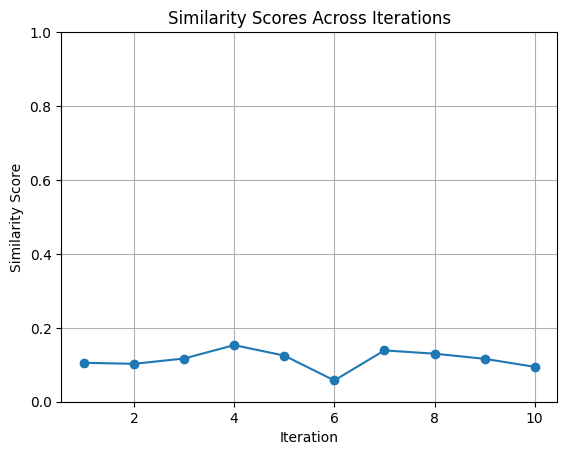

Best Story (Max Similarity):
the two men approached.

"This is the first time I've seen this kind of thing in my life," he said. "I don't know if it's a coincidence or not, but this is something that's been going on for I was riding down the hill. It was like a scene out of a horror movie. I felt like I had to do something to protect myself." the men climbed up to the top of the mountain, where they were met by a large group of people who had come from all over the world to watch the event. One of them, who was wearing a ski mask, told the group that he the man in the mask was approached by two other men who were wearing ski masks. They were all in their 20s and 30s, and they all said that they had seen a man with a mask on and that it looked like he was going the two groups of men tried to get away from each other. At one point, one man said to another man, "You're going to kill me." The men said they would kill him if they saw him again. Then, the other man
Maximum Similarity Score: 

In [25]:
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(text1, text2):
    vectorizer = TfidfVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    return cosine_similarity(vectors)[0, 1]

def generate_story(captions, model, tokenizer, max_length=50, beam_width=3, top_k=30, top_p=0.85, temperature=0.7):
    story = ""
    for caption in captions:
        input_text = f"{story} {caption}. The scene unfolded as"
        inputs = tokenizer.encode(input_text.strip(), return_tensors='pt')

        outputs = model.generate(
            inputs,
            max_length=inputs.shape[1] + max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            top_k=top_k,
            top_p=top_p,
            temperature=temperature,
            num_beams=beam_width
        )

        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        new_content = generated_text[len(input_text):].strip()
        story = story + " " + new_content

    return story.strip()

# Load model and tokenizer
model_name = 'gpt2'
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Input captions
captions = [
    "A group of people walking up a snowy slope",
    "A person on a snowboard on a mountain",
    "A man climbing up a snowy mountain",
    "A man standing on top of a mountain",
    "A man sitting on top of a snowy mountain"
]

# Combine all captions into a single string
combined_captions = ' '.join(captions)

# RL-inspired iterative process
iterations = 10
similarity_scores = []
temperature = 0.7  # Initial value
top_k = 30
top_p = 0.85

previous_similarity = 0.0
best_story = ""
max_similarity = 0.0

for i in range(iterations):
    story = generate_story(captions, model, tokenizer, temperature=temperature, top_k=top_k, top_p=top_p)
    
    # Calculate similarity score with the combined captions
    similarity = calculate_similarity(story, combined_captions)
    similarity_scores.append(similarity)

    print(f"Iteration {i + 1}:")
    print(f"Story:\n{story}\n")
    print(f"Similarity Score: {similarity:.4f}\n")

    # Check for the best story
    if similarity > max_similarity:
        max_similarity = similarity
        best_story = story  # Store the best story

    # Reinforcement learning-inspired adjustment
    if similarity > previous_similarity:
        # Reward: Increase exploration if similarity improves
        temperature = min(1.0, temperature + 0.01)
        top_k = min(50, top_k + 1)
        top_p = min(0.95, top_p + 0.01)
    else:
        # Punishment: Reduce exploration if similarity drops
        temperature = max(0.5, temperature - 0.01)
        top_k = max(10, top_k - 1)
        top_p = max(0.75, top_p - 0.01)

    previous_similarity = similarity

# Plot similarity scores
plt.plot(range(1, iterations + 1), similarity_scores, marker='o')
plt.title('Similarity Scores Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Similarity Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Print the best story and its similarity score
print("Best Story (Max Similarity):")
print(best_story)
print(f"Maximum Similarity Score: {max_similarity:.4f}")


# Calculating Rouge score

In [36]:
from nltk.translate.bleu_score import corpus_bleu
import nltk
nltk.download('punkt')

# Simplified ROUGE-1 calculation remains the same
def rouge1_score(reference, hypothesis):
    reference_words = set(reference.split())
    hypothesis_words = set(hypothesis.split())
    overlap = reference_words.intersection(hypothesis_words)
    recall = len(overlap) / len(reference_words) if reference_words else 0
    precision = len(overlap) / len(hypothesis_words) if hypothesis_words else 0
    f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0
    return {"rouge1_recall": recall, "rouge1_precision": precision, "rouge1_f1": f1_score}

# Calculate ROUGE-1 with combined captions as the reference
rouge1_scores = rouge1_score(' '.join(captions), best_story)
print(f"ROUGE-1 Scores: {rouge1_scores}")


ROUGE-1 Scores: {'rouge1_recall': 0.4444444444444444, 'rouge1_precision': 0.07079646017699115, 'rouge1_f1': 0.12213740458015265}


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
